In [33]:
combined_df = pd.concat([car, mobile, movie, restaurant], ignore_index=True)
combined_df

,Id,Comment,"{Aspect category, Sentiment Polarity}"
0,1,হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে কিন্তু নরমাল ব্রে...,"{safety, negative}, {safety, positive}"
1,2,লেদার সিটগুলা খুব একটা কমফরটেবল না হলেও গাড়িটা...,"{comfort, negative}, {interior, positive}"
2,3,গাড়িটায় একদম নিউ কালার করা হয়েছে কিন্তু এই কাল...,"{exterior, positive}, {exterior, negative}"
3,4,ইঞ্জিনে পারফরমেন্স হেডার লাগানো আছে কিন্তু ইন্...,"{performance, positive}, {performance, negative}"
4,5,সামনের সিটে কম হেডরুম কিন্তু পিছনে আরো বেটার হ...,"{comfort, negative}, {comfort, positive}"
...,...,...,...
3720,797,"মাংসের আইটেম শুধু চর্বি ও চর্বি, তবে দাম একটু ...","{food, negative}, {price, negative}"
3721,798,"রেস্তোরাঁর ম্যানেজমেন্ট ভালোভাবে চালাতে জানে, ...","{miscellaneous, positive}, {service, positive}"
3722,799,এই রেস্তোরাঁর খাবার ভালো হলেও কর্মীরা খুব একটা...,"{food, positive}, {miscellaneous, negative}"
3723,800,আমি এর আগে ওয়েটারদের কাছ থেকে এত দুর্দান্ত পর...,"{service, positive}, {food, positive}"


In [34]:
combined_df = combined_df.drop(columns=['Id'])

In [ ]:
combined_df.head()

In [ ]:
print(combined_df.columns)

In [35]:
import pandas as pd
import re


bangla_conjunctions = [
    "এবং", "আর", "অথবা", "কিংবা", "কিন্তু", "তবে", "অথচ", "তবু", 
    "যদি", "যেহেতু", "যেন", "যতক্ষণ", "তাই", "কারণ", "যতই", 
    "যদি না", "যদিও", "এমনকি", "অতএব", "তথাপি", "হলেও", "থাকলেও",
    "তাও", "হলেও", "বাট", ",", "সত্তেও", "উইথ", "অ্যান্ড", "তবুও", "বরং", "করলেও",
    "পরও", "লাগলেও", "এছাড়া", "আবার", "কিংবা", "কারন", "কারণে", "অথচ", "পারলেও",
    "অর", "যদি", " বা ", "এছাড়া", 
]


conjunction_pattern = "|".join(map(re.escape, bangla_conjunctions))

def process_comment(row):
    # Split the comment based on conjunctions
    parts = re.split(conjunction_pattern, row['Comment'])
    
    
    aspect_sentiment_pairs = row['{Aspect category,   Sentiment Polarity}'].replace('{', '').replace('}', '').split(', ')
    
    # Check if there are 2 or more parts and at least 4 aspect-sentiment pairs
    if len(parts) >= 2 and len(aspect_sentiment_pairs) >= 4:
        result = []
        for i in range(2):  # We only want to use the first two parts
            if i * 2 + 1 < len(aspect_sentiment_pairs):  # Ensure we don't go out of bounds
                aspect = aspect_sentiment_pairs[i*2].strip()  # Aspect
                sentiment = aspect_sentiment_pairs[i*2+1].strip()  # Sentiment
                formatted_row = [parts[i].strip(), aspect, sentiment]  # Split comment + aspect + sentiment
                result.append(formatted_row)
        return result
    return []

# Apply the function to the 'Comment' column
expanded_rows = []
for _, row in combined_df.iterrows():
    expanded_rows.extend(process_comment(row))

# Convert the expanded rows into a DataFrame
expanded_df = pd.DataFrame(expanded_rows, columns=['Comment', 'Aspect', 'Sentiment'])

# Display the expanded DataFrame
expanded_df.head()


,Comment,Aspect,Sentiment
0,হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে,safety,negative
1,নরমাল ব্রেক গুলা ঠিকই আছে।,safety,positive
2,লেদার সিটগুলা খুব একটা কমফরটেবল না,comfort,negative
3,গাড়িটার কেবিনটা সুন্দর।,interior,positive
4,গাড়িটায় একদম নিউ কালার করা হয়েছে,exterior,positive


In [ ]:
expanded_df.isnull().sum()

In [ ]:
expanded_df.duplicated().sum()

In [36]:
expanded_df = expanded_df.drop_duplicates()
expanded_df.duplicated().sum()
len(expanded_df)

6498

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


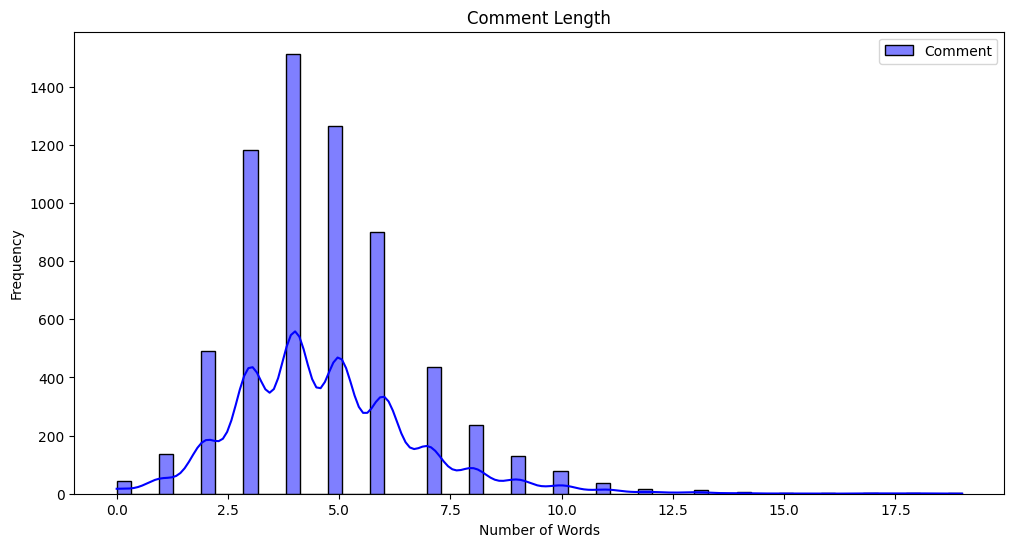

([('অভ নয', 56),
  ('গল পট', 56),
  ('অস রণ', 51),
  ('নষ হয়', 41),
  ('কর হয়', 40),
  ('অন কম', 37),
  ('অভ নয়', 36),
  ('কর মচ', 32),
  ('মন হচ', 29),
  ('ইঞ নট', 27)],
 [('ইন সটল কর', 14),
  ('অন শব কর', 10),
  ('পর ছন নত', 9),
  ('পর শও অন', 7),
  ('কর মচ অন', 7),
  ('ইন পট মন', 6),
  ('পট মন টর', 6),
  ('এন রট নম', 6),
  ('সটল কর হয়', 6),
  ('সব অভ নয়', 6)])

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
nltk.download('punkt')

df_eda = expanded_df.copy()


def calculate_lengths(df):
    df['comment_length'] = df['Comment'].apply(lambda x: len(nltk.word_tokenize(x)))


def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


calculate_lengths(df_eda)

# Prepare data for analysis
comment_lengths = {
    'Comment': df_eda['comment_length'],
}


top_bigrams = get_top_ngrams(df_eda['Comment'], n=10, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(df_eda['Comment'], n=10, ngram_range=(3, 3))

# Plotting the histogram for headline lengths
plt.figure(figsize=(12, 6))
sns.histplot(comment_lengths['Comment'], label='Comment', color='blue', kde=True)
plt.title('Comment Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


top_bigrams, top_trigrams


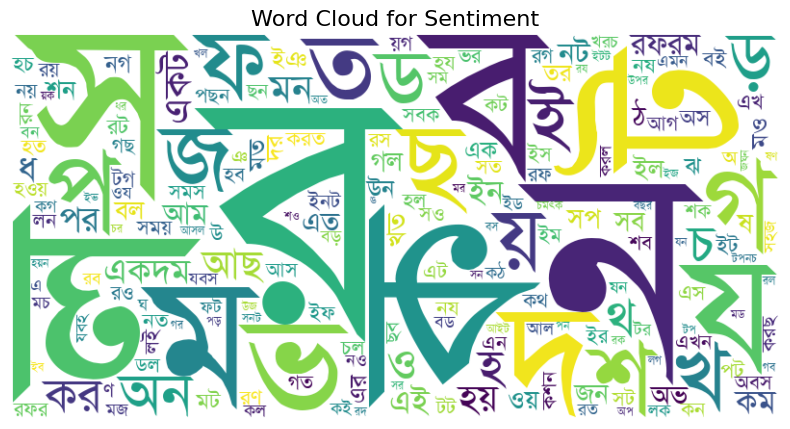

In [38]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


combined_content_bangla = ' '.join(df_eda['Comment'].astype(str))


wordcloud_bangla = WordCloud(width=800, height=400, background_color='white',
                             collocations=False, font_path='/kaggle/input/bangla-font/SolaimanLipi.ttf').generate(combined_content_bangla)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bangla, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Sentiment", fontsize=16)
plt.show()

In [ ]:
df_eda['comment_length'].describe()

In [39]:
import spacy
nlp = spacy.load('en_core_web_sm')
df_eda['pos_tags'] = df_eda['Comment'].apply(lambda x: [token.pos_ for token in nlp(x)])

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [40]:
df_eda['pos_tags']

0                                [PUNCT, PROPN, PROPN, X]
1                       [PUNCT, NOUN, ADV, X, NOUN, NOUN]
2                    [INTJ, NOUN, ADJ, PROPN, INTJ, NOUN]
3                              [PROPN, PROPN, NOUN, NOUN]
4                    [PROPN, NOUN, PUNCT, VERB, PROPN, X]
                              ...                        
7158                           [PROPN, PUNCT, NOUN, NOUN]
7159                   [VERB, ADJ, PROPN, PROPN, X, NOUN]
7160    [PROPN, AUX, VERB, PROPN, PROPN, PROPN, PROPN,...
7161                     [PUNCT, PROPN, PRON, X, X, VERB]
7162                                [PROPN, PROPN, PROPN]
Name: pos_tags, Length: 6498, dtype: object

In [41]:
from textblob import TextBlob
df_eda['sentiment'] = df_eda['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [42]:
df_eda['sentiment']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7158    0.0
7159    0.0
7160    0.0
7161    0.0
7162    0.0
Name: sentiment, Length: 6498, dtype: float64

In [ ]:
df_eda

In [43]:
stopwords = [
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আছে', 'আত্মা', 'আদ্যভাগে',
    'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উক্ত', 'উনি',
    'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একে', 'একটি', 'একবার', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা',
    'এটাই', 'এটি', 'এত', 'এতটাই', 'এদের', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওদের',
    'ওর', 'ওরা', 'কত', 'কবে', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করানো', 'করায়', 'করি', 'করিয়া', 'করিয়ে',
    'করেছে', 'করেছেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কী', 'কে', 'কেউ',
    'কেউই', 'কেন', 'কখনও', 'কত', 'কয়েক', 'কয়েকটি', 'ক্ষেত্রে', 'খুব', 'গিয়ে', 'গিয়েছে', 'গিয়েছিল', 'গেছে', 'চলে',
    'চান', 'চেয়ে', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন্য', 'জন্যে', 'জানতে', 'জানায়', 'জানানো', 'জানিয়ে', 'জানি',
    'জানিয়ে', 'তখন', 'তবে', 'তবু', 'তাহলে', 'তাহার', 'তাদের', 'তার', 'তারপর', 'তারা', 'তাহা', 'তাকে', 'তাহাতে', 'তুমি',
    'তুলে', 'থাকে', 'থাকেন', 'থাকায়', 'থেকে', 'থেকেই', 'থেকেছে', 'থেকে', 'দিই', 'দিয়ে', 'দিয়ে', 'দেন', 'দেখা', 'দেখে',
    'দেয়', 'দেওয়া', 'দেওয়া হয়', 'দেওয়ার', 'ধরা', 'ধরে', 'নয়', 'নাকি', 'নাগাদ', 'নানা', 'নিয়ে', 'নিজে', 'নিজেই',
    'নিজেদের', 'নিজের', 'নতুন', 'নির্বাচিত', 'নীচের', 'নেকি', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পর্যন্ত', 'পাওয়া', 'পাচ্ছে',
    'পারি', 'পারি না', 'পারে', 'পূর্ব', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 'ফের', 'বহু', 'বলা', 'বলতে',
    'বলল', 'বললেন', 'বলে', 'বলেই', 'বলেছেন', 'বলছিল', 'বলছেন', 'বসে', 'বহু', 'বসে', 'বহুমান', 'ভাবে', 'ভাবেই', 'মধ্য',
    'মধ্যেও', 'মধ্যে', 'মাত্র', 'মনে', 'মত', 'মতো', 'যখন', 'যদি', 'যদিও', 'যা', 'যাকে', 'যাচ্ছে', 'যাতে', 'যেন', 'যে',
    'যেতে', 'যায়', 'যারা', 'যাকে', 'যে', 'যেখানে', 'যেতে', 'যথেষ্ট', 'যদি', 'যা', 'রাখা', 'রাখার', 'রেখে', 'শুধু',
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে',
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ার', 'হচ্ছে', 'হচ্ছি', 'হবেন', 'হয়ে', 'হয়েছে', 'হয়েছেন', 'হয়তো',
    'হল', 'হলে', 'হলেই', 'হলো'
]

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk



def custom_tokenizer(text):
    tokens = text.split()
    return [word for word in tokens if word not in stopwords]


vectorizer = CountVectorizer(stop_words=stopwords, tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(df_eda['Comment'])


lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(X)


terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index+1}:")
    print([terms[i] for i in topic.argsort()[-5:]])  

Topic #1:
['ছিল।', 'ভালো।', 'ভালো', 'খুবই', 'খাবারের']
Topic #2:
['না', 'সাথে', 'ভালো', 'না।', 'ফোনের']
Topic #3:
['ফোনটা', 'বেশ', 'একদম', 'গাড়িটা', 'না']
Topic #4:
['কম', 'ছিলো', 'দাম', 'বেশি', 'ভালো']


In [47]:
import re

# Comprehensive list of Bangla stopwords
stopwords = {
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আছে', 'আত্মা', 'আদ্যভাগে',
    'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উক্ত', 'উনি',
    'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একে', 'একটি', 'একবার', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা',
    'এটাই', 'এটি', 'এত', 'এতটাই', 'এদের', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওদের',
    'ওর', 'ওরা', 'কত', 'কবে', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করানো', 'করায়', 'করি', 'করিয়া', 'করিয়ে',
    'করেছে', 'করেছেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কী', 'কে', 'কেউ',
    'কেউই', 'কেন', 'কখনও', 'কত', 'কয়েক', 'কয়েকটি', 'ক্ষেত্রে', 'খুব', 'গিয়ে', 'গিয়েছে', 'গিয়েছিল', 'গেছে', 'চলে',
    'চান', 'চেয়ে', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন্য', 'জন্যে', 'জানতে', 'জানায়', 'জানানো', 'জানিয়ে', 'জানি',
    'জানিয়ে', 'তখন', 'তবে', 'তবু', 'তাহলে', 'তাহার', 'তাদের', 'তার', 'তারপর', 'তারা', 'তাহা', 'তাকে', 'তাহাতে', 'তুমি',
    'তুলে', 'থাকে', 'থাকেন', 'থাকায়', 'থেকে', 'থেকেই', 'থেকেছে', 'থেকে', 'দিই', 'দিয়ে', 'দিয়ে', 'দেন', 'দেখা', 'দেখে',
    'দেয়', 'দেওয়া', 'দেওয়া হয়', 'দেওয়ার', 'ধরা', 'ধরে', 'নয়', 'নাকি', 'নাগাদ', 'নানা', 'নিয়ে', 'নিজে', 'নিজেই',
    'নিজেদের', 'নিজের', 'নতুন', 'নির্বাচিত', 'নীচের', 'নেকি', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পর্যন্ত', 'পাওয়া', 'পাচ্ছে',
    'পারি', 'পারি না', 'পারে', 'পূর্ব', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 'ফের', 'বহু', 'বলা', 'বলতে',
    'বলল', 'বললেন', 'বলে', 'বলেই', 'বলেছেন', 'বলছিল', 'বলছেন', 'বসে', 'বহু', 'বসে', 'বহুমান', 'ভাবে', 'ভাবেই', 'মধ্য',
    'মধ্যেও', 'মধ্যে', 'মাত্র', 'মনে', 'মত', 'মতো', 'যখন', 'যদি', 'যদিও', 'যা', 'যাকে', 'যাচ্ছে', 'যাতে', 'যেন', 'যে',
    'যেতে', 'যায়', 'যারা', 'যাকে', 'যে', 'যেখানে', 'যেতে', 'যথেষ্ট', 'যদি', 'যা', 'রাখা', 'রাখার', 'রেখে', 'শুধু',
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে',
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ার', 'হচ্ছে', 'হচ্ছি', 'হবেন', 'হয়ে', 'হয়েছে', 'হয়েছেন', 'হয়তো',
    'হল', 'হলে', 'হলেই', 'হলো'
}


punctuations = r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।]"
digits = r"\d+"
letters = r"[a-zA-Z]"

def tokenize(text):
    return text.split()

def clean_text(text):
    tokens = tokenize(text)

    filtered = []
    for token in tokens:
        if token in stopwords:
            continue

        
        token_clean = re.sub(punctuations, "", token)
        token_clean = re.sub(digits, "", token_clean)
        token_clean = re.sub(letters, "", token_clean)

        if token_clean: 
            filtered.append(token_clean)

    return " ".join(filtered)


for i in range(10):
    print(f"********** Before (Text {i+1}) ***************")
    text = df_eda.iloc[i]['Comment']
    print(text)
    
    print(f"\n********** After (Text {i+1}) ***************")
    print(clean_text(text))
    print("\n" + "="*50 + "\n")



********** Before (Text 1) ***************
হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে

********** After (Text 1) ***************
হ্যান্ডব্রেকটা নষ্ট হয়ে


********** Before (Text 2) ***************
নরমাল ব্রেক গুলা ঠিকই আছে।

********** After (Text 2) ***************
নরমাল ব্রেক গুলা ঠিকই আছে


********** Before (Text 3) ***************
লেদার সিটগুলা খুব একটা কমফরটেবল না

********** After (Text 3) ***************
লেদার সিটগুলা একটা কমফরটেবল না


********** Before (Text 4) ***************
গাড়িটার কেবিনটা সুন্দর।

********** After (Text 4) ***************
গাড়িটার কেবিনটা সুন্দর


********** Before (Text 5) ***************
গাড়িটায় একদম নিউ কালার করা হয়েছে

********** After (Text 5) ***************
গাড়িটায় একদম নিউ কালার করা হয়েছে


********** Before (Text 6) ***************
এই কালার কয়দিন টিকবে তার কোনো গ্যারান্টি নাই।

********** After (Text 6) ***************
কালার কয়দিন টিকবে কোনো গ্যারান্টি নাই


********** Before (Text 7) ***************
ইঞ্জিনে পারফরমেন্স হেডার লাগানো আছে

********** After (Text 

In [49]:
expanded_df['cleaned_comment'] = expanded_df.Comment.apply(clean_text)

In [50]:
expanded_df['cleaned_comment']

0                         হ্যান্ডব্রেকটা নষ্ট হয়ে
1                       নরমাল ব্রেক গুলা ঠিকই আছে
2                  লেদার সিটগুলা একটা কমফরটেবল না
3                          গাড়িটার কেবিনটা সুন্দর
4                গাড়িটায় একদম নিউ কালার করা হয়েছে
                          ...                    
7158                        রেস্তোরাঁর খাবার ভালো
7159                        কর্মীরা একটা দক্ষ নয়
7160    এর আগে ওয়েটারদের দুর্দান্ত পরিষেবা পাইনি
7161                       খাবারের মানও খারাপ নয়
7162                                গুণগত মান ভাল
Name: cleaned_comment, Length: 6498, dtype: object

In [51]:
final_df = expanded_df[['cleaned_comment', 'Aspect', 'Sentiment']]
final_df.describe

<bound method NDFrame.describe of                                 cleaned_comment         Aspect Sentiment
0                       হ্যান্ডব্রেকটা নষ্ট হয়ে         safety  negative
1                     নরমাল ব্রেক গুলা ঠিকই আছে         safety  positive
2                লেদার সিটগুলা একটা কমফরটেবল না        comfort  negative
3                        গাড়িটার কেবিনটা সুন্দর       interior  positive
4              গাড়িটায় একদম নিউ কালার করা হয়েছে       exterior  positive
...                                         ...            ...       ...
7158                      রেস্তোরাঁর খাবার ভালো           food  positive
7159                      কর্মীরা একটা দক্ষ নয়  miscellaneous  negative
7160  এর আগে ওয়েটারদের দুর্দান্ত পরিষেবা পাইনি        service  positive
7161                     খাবারের মানও খারাপ নয়           food  positive
7162                              গুণগত মান ভাল           food  positive

[6498 rows x 3 columns]>

In [52]:
file_path = '/kaggle/working/final_df1.csv' 
final_df.to_csv(file_path, index=False)

In [53]:
misspellings = {
    'positiive': 'positive',
    'positiveperformance': 'positive',
    'positivel': 'positive',
    'postive': 'positive',
    'positive.food': 'positive',
    'psoitive': 'positive',
    'negative': 'negative',
    'negative,': 'negative',
    'positive': 'positive',
    'positive,': 'positive',
    'Positive': 'positive',
    'positive,performance': 'positive',
    'neutral': 'neutral',
}

# Replace Sentiments in the DataFrame
final_df['Sentiment'] = final_df['Sentiment'].replace(misspellings)
final_df['Sentiment'] = final_df['Sentiment'].fillna('neutral')

# Display the DataFrame
print(final_df)


                                cleaned_comment         Aspect Sentiment
0                       হ্যান্ডব্রেকটা নষ্ট হয়ে         safety  negative
1                     নরমাল ব্রেক গুলা ঠিকই আছে         safety  positive
2                লেদার সিটগুলা একটা কমফরটেবল না        comfort  negative
3                        গাড়িটার কেবিনটা সুন্দর       interior  positive
4              গাড়িটায় একদম নিউ কালার করা হয়েছে       exterior  positive
...                                         ...            ...       ...
7158                      রেস্তোরাঁর খাবার ভালো           food  positive
7159                      কর্মীরা একটা দক্ষ নয়  miscellaneous  negative
7160  এর আগে ওয়েটারদের দুর্দান্ত পরিষেবা পাইনি        service  positive
7161                     খাবারের মানও খারাপ নয়           food  positive
7162                              গুণগত মান ভাল           food  positive

[6498 rows x 3 columns]


<ipython-input-53-57b074fa72cf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sentiment'] = final_df['Sentiment'].replace(misspellings)
<ipython-input-53-57b074fa72cf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sentiment'] = final_df['Sentiment'].fillna('neutral')


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encoding
aspect_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()

final_df['aspect_label'] = aspect_encoder.fit_transform(final_df['Aspect'])
final_df['sentiment_label'] = sentiment_encoder.fit_transform(final_df['Sentiment'])

# Example encoding
final_df.head()

In [56]:
data = final_df.copy()

In [57]:
import pandas as pd
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


aspect_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()

data["aspect_label"] = aspect_encoder.fit_transform(data["Aspect"])
data["sentiment_label"] = sentiment_encoder.fit_transform(data["Sentiment"])


tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")


MAX_LENGTH = 128

def tokenize_data(row):
    return tokenizer(
        row['cleaned_comment'],
        padding='max_length',
        truncation=True,
        max_length=MAX_LENGTH,
        return_tensors="pt"
    )


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


train_encodings = tokenizer(
    train_data["cleaned_comment"].tolist(),
    padding=True,
    truncation=True,
    max_length=MAX_LENGTH,
    return_tensors="pt"
)

test_encodings = tokenizer(
    test_data["cleaned_comment"].tolist(),
    padding=True,
    truncation=True,
    max_length=MAX_LENGTH,
    return_tensors="pt"
)

train_encodings


{'input_ids': tensor([[  101,   969, 82825,  ...,     0,     0,     0],
        [  101,   950, 18770,  ...,     0,     0,     0],
        [  101,   100, 18601,  ...,     0,     0,     0],
        ...,
        [  101,   965, 58354,  ...,     0,     0,     0],
        [  101, 14770, 77983,  ...,     0,     0,     0],
        [  101,   100,   946,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [62]:
import torch
from torch.utils.data import Dataset

class MultilingualDataset(Dataset):
    def __init__(self, encodings, aspect_labels, sentiment_labels):
        self.encodings = encodings
        self.aspect_labels = aspect_labels
        self.sentiment_labels = sentiment_labels

    def __len__(self):
        return len(self.aspect_labels)

    def __getitem__(self, idx):
        
        item = {key: val[idx] for key, val in self.encodings.items()}
        
        item['aspect_labels'] = torch.tensor(self.aspect_labels[idx], dtype=torch.long)
        item['sentiment_labels'] = torch.tensor(self.sentiment_labels[idx], dtype=torch.long)
        return item


train_dataset = MultilingualDataset(
    train_encodings, 
    train_data["aspect_label"].tolist(), 
    train_data["sentiment_label"].tolist()
)
test_dataset = MultilingualDataset(
    test_encodings, 
    test_data["aspect_label"].tolist(), 
    test_data["sentiment_label"].tolist()
)


for i in range(5):
    sample = test_dataset[i] 
    sentence = {key: val.tolist() for key, val in sample.items() if key in ["input_ids", "attention_mask"]} 
    aspect_label = sample['aspect_labels'].item()  # Convert tensor to scalar
    sentiment_label = sample['sentiment_labels'].item()  # Convert tensor to scalar

    print(f"Sentence {i+1}: {sentence}")
    print(f"Aspect Label: {aspect_label}")
    print(f"Sentiment Label: {sentiment_label}")
    print("\n")



Sentence 1: {'input_ids': [101, 19320, 81323, 18262, 971, 28725, 16431, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Aspect Label: 11
Sentiment Label: 3


Sentence 2: {'input_ids': [101, 14770, 20725, 82825, 16431, 86677, 978, 12235, 18513, 18262, 40560, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Aspect Label: 10
Sentiment Label: 3


Sentence 3: {'input_ids': [101, 979, 16431, 88684, 63820, 29740, 12235, 99092, 11421, 72088, 976, 64437, 11199, 100, 939, 39427, 111240, 53574, 40102, 972, 11737, 941, 90534, 950, 42620, 16431, 102, 0, 0, 0, 

In [60]:
from transformers import AutoModelForSequenceClassification, AdamW
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm


model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", 
    num_labels=len(aspect_encoder.classes_) + len(sentiment_encoder.classes_)
)


optimizer = AdamW(model.parameters(), lr=5e-5)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


for epoch in range(3): 
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}")
    for batch in progress_bar:
        optimizer.zero_grad()

        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        aspect_labels = batch['aspect_labels'].to(device)
        sentiment_labels = batch['sentiment_labels'].to(device)

        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        
        aspect_logits, sentiment_logits = torch.split(
            logits, 
            [len(aspect_encoder.classes_), len(sentiment_encoder.classes_)],
            dim=1
        )

        
        aspect_loss = nn.CrossEntropyLoss()(aspect_logits, aspect_labels)
        sentiment_loss = nn.CrossEntropyLoss()(sentiment_logits, sentiment_labels)
        loss = aspect_loss + sentiment_loss

        
        loss.backward()
        optimizer.step()

        
        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch {epoch + 1} completed. Average loss: {total_loss / len(train_loader):.4f}")


model.safetensors:  32%|###2      | 231M/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 650/650 [01:08<00:00,  9.42it/s, loss=1.63] 


Epoch 1 completed. Average loss: 2.9490


Epoch 2: 100%|██████████| 650/650 [01:11<00:00,  9.09it/s, loss=2.14] 


Epoch 2 completed. Average loss: 2.0416


Epoch 3: 100%|██████████| 650/650 [01:12<00:00,  8.93it/s, loss=1.33] 

Epoch 3 completed. Average loss: 1.6934


In [ ]:
print("Class Distribution in Train Data:")
print(train_data["aspect_label"].value_counts())

print("\nClass Distribution in Test Data:")
print(test_data["aspect_label"].value_counts())


In [ ]:
print(test_data.tail())


In [63]:
from sklearn.metrics import classification_report

model.eval()
all_aspect_preds, all_sentiment_preds = [], []
all_aspect_labels, all_sentiment_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # Get aspect and sentiment labels
        aspect_labels = batch['aspect_labels'].to(device)
        sentiment_labels = batch['sentiment_labels'].to(device)

        # Get model outputs
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Split logits for aspect and sentiment
        aspect_logits, sentiment_logits = torch.split(
            logits, 
            [len(aspect_encoder.classes_), len(sentiment_encoder.classes_)],
            dim=1
        )

        # Predictions for aspect and sentiment
        aspect_preds = torch.argmax(aspect_logits, dim=1)
        sentiment_preds = torch.argmax(sentiment_logits, dim=1)

        # Collect predictions and ground truths
        all_aspect_preds.extend(aspect_preds.cpu().numpy())
        all_sentiment_preds.extend(sentiment_preds.cpu().numpy())
        all_aspect_labels.extend(aspect_labels.cpu().numpy())
        all_sentiment_labels.extend(sentiment_labels.cpu().numpy())

from sklearn.metrics import classification_report

print("Aspect Classification Report:")
print(classification_report(
    all_aspect_labels,
    all_aspect_preds,
    labels=range(len(aspect_encoder.classes_)),  # Match all classes
    target_names=aspect_encoder.classes_
))


print("\nSentiment Classification Report:")
print(classification_report(
    all_sentiment_labels, 
    all_sentiment_preds,
    labels=range(len(sentiment_encoder.classes_)),
    target_names=sentiment_encoder.classes_  # Use the full class list
))



Evaluating: 100%|██████████| 163/163 [00:03<00:00, 45.29it/s]

Aspect Classification Report:
                 precision    recall  f1-score   support

          Story       0.00      0.00      0.00         1
    accessories       0.29      0.21      0.24        43
       ambiance       0.49      0.58      0.53        36
        battery       0.75      0.90      0.82        48
         camera       0.92      0.82      0.87        40
        comfort       0.60      0.43      0.50        60
         design       0.67      0.77      0.71        39
        display       0.90      0.84      0.87        31
       exterior       0.50      0.57      0.53        58
           food       0.66      0.87      0.75       112
       interior       0.45      0.11      0.18        44
  miscellaneous       0.45      0.24      0.31        87
          music       0.88      0.86      0.87        44
         others       0.52      0.72      0.60       123
     performace       0.00      0.00      0.00         2
    performance       0.80      0.58      0.67       194



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification

In [ ]:
import numpy as np
import torch
from lime.lime_text import LimeTextExplainer
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder

# Step 1: Define the predict function for LIME
def predict_fn(texts):
    """
    A function to predict aspect and sentiment probabilities for a list of texts.
    
    Args:
        texts: List of input texts to predict.
        
    Returns:
        Combined probability predictions for aspect and sentiment classes.
    """
    encodings = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=MAX_LENGTH,
        return_tensors="pt"
    )
    
    # Move tensors to the correct device
    encodings = {key: val.to(device) for key, val in encodings.items()}
    
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        
        # Split logits into aspect and sentiment parts
        aspect_logits, sentiment_logits = torch.split(
            logits,
            [len(aspect_encoder.classes_), len(sentiment_encoder.classes_)],
            dim=1
        )
        
        # Apply softmax to get probabilities
        aspect_probs = torch.nn.functional.softmax(aspect_logits, dim=-1).cpu().numpy()
        sentiment_probs = torch.nn.functional.softmax(sentiment_logits, dim=-1).cpu().numpy()
        
        # Return concatenated probabilities for both aspect and sentiment
        return np.concatenate((aspect_probs, sentiment_probs), axis=1)

# Step 2: Initialize LIME Explainer
explainer = LimeTextExplainer(
    class_names=aspect_encoder.classes_.tolist() + sentiment_encoder.classes_.tolist()
)

# Step 3: Pick a random instance from the test set to explain
i = np.random.randint(0, len(test_data))  # Random instance
text_instance = test_data["cleaned_comment"].iloc[i]

# Step 4: Generate explanation for the selected instance
explanation = explainer.explain_instance(
    text_instance,  # Text to explain
    predict_fn,     # Prediction function
    num_features=10 # Number of features to explain
)

# Step 5: Show explanation in the notebook
explanation.show_in_notebook()

# Step 6: Optionally, save the explanation to an HTML file
explanation.save_to_file('lime_explanation.html')

# Step 7: Display predicted aspect and sentiment for the chosen instance
aspects, sentiments = predict(model, tokenizer, [text_instance])
print(f"Text: {text_instance}")
print(f"Predicted Aspect: {aspects[0]}, Predicted Sentiment: {sentiments[0]}")


In [73]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from lime.lime_text import LimeTextExplainer
import numpy as np


model_name = "bert-base-multilingual-cased" 
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3) 


device = torch.device("cpu")
model.to(device)
model.eval()


def predict_sentiment(texts):
    """Predict probabilities for a list of texts."""
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1).cpu().numpy()  
    return probs


sentiment_classes = ["Negative", "Neutral", "Positive"] 
sample_text = "দাম বেশি ছিল"


explainer = LimeTextExplainer(class_names=sentiment_classes)


explanation = explainer.explain_instance(
    sample_text,                  
    predict_sentiment,            
    num_features=10,              
    #top_labels=2                 
)


explanation.show_in_notebook(text=True)  


explanation_as_list = explanation.as_list()


print(explanation_as_list)


explanation.save_to_file("lime_sentiment_explanation.html")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[('ল', -0.006640645981956301), ('শ', 0.00522921842437189), ('ব', 0.0021196447801338403), ('ছ', 0.0018715486464316443), ('ম', 0.0011210311352965454), ('দ', 0.0005708878927992067)]


In [74]:
import shap
import torch
from transformers import AutoTokenizer


model.eval()


def predict_proba(texts):
    """
    Wrapper for predicting probabilities for a list of texts using the model.
    Args:
    - texts (list of str): List of input texts.

    Returns:
    - np.array: Predicted probabilities for each class.
    """
   
    if isinstance(texts, np.ndarray):
        texts = texts.tolist()

    inputs = tokenizer.batch_encode_plus(
        texts,
        max_length=100,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    
    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = output.logits  
        probabilities = torch.softmax(logits, dim=1).cpu().numpy()
    return probabilities


tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


background_texts = [
    "খাবারটি অত্যন্ত সুস্বাদু",
    "দাম বেশি ছিল"
]
background = tokenizer.batch_encode_plus(
    background_texts,
    max_length=100,
    truncation=True,
    padding="max_length",
    return_tensors="pt"
)
background_input_ids = background["input_ids"].to(device)
background_attention_mask = background["attention_mask"].to(device)


explainer = shap.Explainer(
    predict_proba,
    masker=shap.maskers.Text(tokenizer),
)


texts_to_explain = [
    "যদিও খাদ্য ভাল ছিল ",
     "পরিবেষনা ছিল বাজে।"
]


shap_values = explainer(texts_to_explain)


shap.plots.text(shap_values[0])
